In [1]:
import numpy as np

In [2]:
states = [((cards,usable_ace),dealer_card) for cards in range(12,22)\
           for usable_ace in [True,False] for dealer_card in range(2,12) ]


In [3]:
len(states)

200

In [4]:
actions = ['hit','stand']

In [5]:
def random_card():
    card = np.random.randint(1,14)
    if card >=10 :
        return 10
    elif card == 1:
        return 11
    else:   
        return card

In [6]:
def hit(player_hand):
    
    card = random_card()
    if player_hand[1]:
        new_player_hand = (player_hand[0]+card,player_hand[1])
        if new_player_hand[0] > 21:
            new_player_hand = (new_player_hand[0]-10,False)
    else:
        if card == 11 and (player_hand[0] + 11 <= 21):
            new_player_hand = (player_hand[0]+card,True)
        elif card == 11 and (player_hand[0] + 11 > 21):
            new_player_hand = (player_hand[0]+1,False)
        else: new_player_hand = (player_hand[0]+card,player_hand[1])

    return new_player_hand

In [7]:
def deal():
    
    natural = False
    
    player_first_card = random_card()
    player_second_card = random_card()
    
    if player_first_card + player_second_card > 21:
        init_player_hand = (player_first_card + player_second_card-10,True)
    else:
        init_player_hand = (player_first_card + player_second_card,(player_first_card==11) or (player_second_card == 11)
                           )
    if init_player_hand == (21,True):
        natural = True
        
    while init_player_hand[0] < 12:
            init_player_hand = hit(init_player_hand)
            
    dealer_hidden_card = random_card()
    dealer_show_card = random_card()
    
    if dealer_hidden_card + dealer_show_card > 21:
        init_dealer_hand = (dealer_hidden_card + dealer_show_card-10,True)
    else:
        init_dealer_hand = (dealer_hidden_card + dealer_show_card,(dealer_hidden_card==11) or (dealer_show_card == 11))
          
    return init_player_hand, natural,init_dealer_hand,dealer_show_card

In [8]:
init_player_hand, natural,init_dealer_hand,dealer_show_card = deal()

In [9]:
init_player_hand

(17, False)

In [10]:
def play(player_hand,action,dealer_hand):
     
    if action == 'stand':
        
        while (dealer_hand[0] < 17):
            dealer_hand = hit(dealer_hand)
            
        if dealer_hand[0] > 21 or dealer_hand[0] < player_hand[0]:
            return (1,'game_over',player_hand,dealer_hand)
        elif dealer_hand[0] == player_hand[0]:
            return (0,'game_over',player_hand,dealer_hand)
        else: return (-1,'game_over',player_hand,dealer_hand)
        
    elif action == 'hit':

        new_player_hand = hit(player_hand)

        if new_player_hand[0] > 21:
            return (-1,'game_over',new_player_hand,dealer_hand)
        else: return (0,'continue',new_player_hand,dealer_hand)
            
   

In [53]:
init_player_hand, natural,init_dealer_hand,dealer_show_card = deal()

player_hand = init_player_hand
dealer_hand = init_dealer_hand

print(init_player_hand, dealer_show_card)



(14, False) 8


In [54]:
action = 'hit'

In [56]:
action = 'stand'

In [57]:
outcome = play(player_hand,action,dealer_hand)
if action == 'stand':
    print('Player: ',outcome[2])
    print('Dealer: ',outcome[3])
    if outcome[0]==1:
            print('Player Wins')
    elif outcome[0]==-1:
            print('Player Loses')
    else:
            print('Tie')
    
else: 
    if outcome[1]=='game_over':
        print('Player: ',outcome[2])
        print('Dealer: ',outcome[3])
        
        if outcome[0]==1:
            print('Player Wins')
        elif outcome[0]==-1:
            print('Player Loses')
        else:
            print('Tie')
        
    else: 
        player_hand = outcome[2]
        print('Player: ', player_hand)

        

Player:  (21, False)
Dealer:  (23, False)
Player Wins


In [58]:
def game(poli):
    
    init_player_hand, natural,init_dealer_hand,dealer_show_card = deal()
    
    if natural:
    
        if init_dealer_hand[0] < 21:
            
            return ((init_player_hand,dealer_show_card),1)
        else:
            return((init_player_hand,dealer_show_card),0)
    else:
        
        player_hand = init_player_hand
        
        if init_dealer_hand[0] == 21:
            return ((player_hand,dealer_show_card),-1)
        else:
            dealer_hand = init_dealer_hand
        
        init_state = (player_hand,dealer_show_card)
        init_action = poli[init_state]
        game_status = 'continue'

        outcome = play(player_hand,init_action,dealer_hand)
        
        
        if outcome[1] == 'game_over':
                return (init_state,outcome[0])
            
        else:
            new_player_hand = outcome[2]
            state = (new_player_hand,dealer_show_card)
            
            game_status= outcome[1]
            
            while game_status == 'continue':
                
                action = poli[state]
                outcome = play(player_hand,action,dealer_hand)
                player_hand = outcome[2]
                state = (player_hand,dealer_show_card) 
                game_status = outcome[1] 
                
    return (init_state,outcome[0])
     

In [59]:
policy = {}
for s in states:
        if s[0][0] < 20:
            policy[s] = 'hit'
        else: policy[s] = 'stand'
   

    

In [60]:
policy

{((12, True), 2): 'hit',
 ((12, True), 3): 'hit',
 ((12, True), 4): 'hit',
 ((12, True), 5): 'hit',
 ((12, True), 6): 'hit',
 ((12, True), 7): 'hit',
 ((12, True), 8): 'hit',
 ((12, True), 9): 'hit',
 ((12, True), 10): 'hit',
 ((12, True), 11): 'hit',
 ((12, False), 2): 'hit',
 ((12, False), 3): 'hit',
 ((12, False), 4): 'hit',
 ((12, False), 5): 'hit',
 ((12, False), 6): 'hit',
 ((12, False), 7): 'hit',
 ((12, False), 8): 'hit',
 ((12, False), 9): 'hit',
 ((12, False), 10): 'hit',
 ((12, False), 11): 'hit',
 ((13, True), 2): 'hit',
 ((13, True), 3): 'hit',
 ((13, True), 4): 'hit',
 ((13, True), 5): 'hit',
 ((13, True), 6): 'hit',
 ((13, True), 7): 'hit',
 ((13, True), 8): 'hit',
 ((13, True), 9): 'hit',
 ((13, True), 10): 'hit',
 ((13, True), 11): 'hit',
 ((13, False), 2): 'hit',
 ((13, False), 3): 'hit',
 ((13, False), 4): 'hit',
 ((13, False), 5): 'hit',
 ((13, False), 6): 'hit',
 ((13, False), 7): 'hit',
 ((13, False), 8): 'hit',
 ((13, False), 9): 'hit',
 ((13, False), 10): 'hit',

In [61]:
init_player_hand, natural,init_dealer_hand,dealer_show_card = deal()

policy[(init_player_hand,dealer_show_card)]

'hit'

In [62]:
rewards = {s:(0,0) for s in states}
for k in range(500000):
    
    initial_state,reward = game(policy)
    
    a = rewards[initial_state][0]
    b = rewards[initial_state][1]
    
    rewards[initial_state] = (a+1,b+reward)
    
    

In [63]:
rewards

{((12, True), 2): (222, -60),
 ((12, True), 3): (232, -85),
 ((12, True), 4): (224, -62),
 ((12, True), 5): (242, -60),
 ((12, True), 6): (257, -35),
 ((12, True), 7): (229, -51),
 ((12, True), 8): (233, -71),
 ((12, True), 9): (231, -59),
 ((12, True), 10): (944, -351),
 ((12, True), 11): (231, -100),
 ((12, False), 2): (4132, -2640),
 ((12, False), 3): (4191, -2640),
 ((12, False), 4): (4164, -2634),
 ((12, False), 5): (4022, -2560),
 ((12, False), 6): (4101, -2553),
 ((12, False), 7): (4011, -2690),
 ((12, False), 8): (4121, -2807),
 ((12, False), 9): (4107, -2743),
 ((12, False), 10): (16573, -11624),
 ((12, False), 11): (4179, -3292),
 ((13, True), 2): (464, -144),
 ((13, True), 3): (448, -135),
 ((13, True), 4): (468, -136),
 ((13, True), 5): (441, -110),
 ((13, True), 6): (424, -129),
 ((13, True), 7): (457, -134),
 ((13, True), 8): (451, -108),
 ((13, True), 9): (459, -155),
 ((13, True), 10): (1869, -767),
 ((13, True), 11): (440, -249),
 ((13, False), 2): (3977, -2771),
 ((13

In [64]:
def v(s):
    (count,total_reward) = rewards[s]
    if count == 0:
        return 0
    else:
        return total_reward/count
    

In [65]:
for s in states:
    print(s,v(s))

((12, True), 2) -0.2702702702702703
((12, True), 3) -0.36637931034482757
((12, True), 4) -0.2767857142857143
((12, True), 5) -0.24793388429752067
((12, True), 6) -0.13618677042801555
((12, True), 7) -0.22270742358078602
((12, True), 8) -0.30472103004291845
((12, True), 9) -0.2554112554112554
((12, True), 10) -0.3718220338983051
((12, True), 11) -0.4329004329004329
((12, False), 2) -0.6389157792836399
((12, False), 3) -0.6299212598425197
((12, False), 4) -0.6325648414985591
((12, False), 5) -0.6364992541024366
((12, False), 6) -0.6225310899780542
((12, False), 7) -0.6706556968337073
((12, False), 8) -0.6811453530696433
((12, False), 9) -0.6678841003165328
((12, False), 10) -0.701381765522235
((12, False), 11) -0.7877482651351998
((13, True), 2) -0.3103448275862069
((13, True), 3) -0.3013392857142857
((13, True), 4) -0.2905982905982906
((13, True), 5) -0.2494331065759637
((13, True), 6) -0.30424528301886794
((13, True), 7) -0.29321663019693656
((13, True), 8) -0.2394678492239468
((13, Tr

In [71]:
def w(player_hand,dealer_show_card):
    return v(((player_hand,True),dealer_show_card))

In [72]:
state_value = np.array([[w(a,b) for a in range(12,22)] for b in range(2,12)])

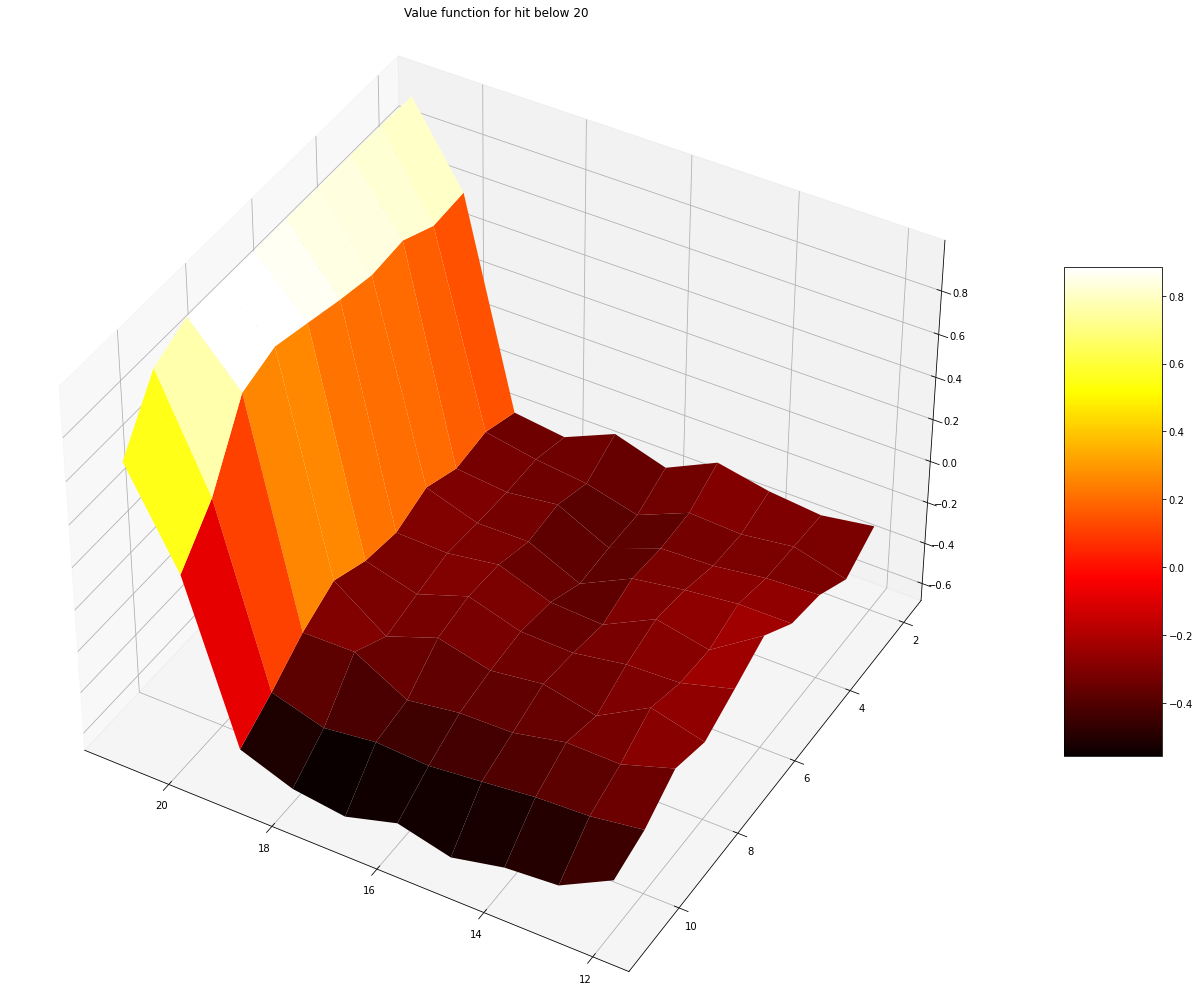

In [73]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator



fig = plt.figure(figsize =(28, 18))
ax = plt.axes(projection ='3d')
# defining surface and axes



x = np.linspace(12, 21, 10)
y = np.linspace(2,11,10)

X,Y = np.meshgrid(x,y)
Z = state_value 

my_cmap = plt.get_cmap('hot')

surf = ax.plot_surface(X, Y, Z,
                       cmap = my_cmap,
                       edgecolor ='none')

fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)


 
ax.set_title('Value function for hit below 20')
    

ax.view_init(40,120)
plt.draw()


plt.show()

## Exploring Starts (starting with random action)

In [74]:
def game_1(poli):
    
    init_player_hand, natural,init_dealer_hand,dealer_show_card = deal()
    
    if natural:
    
        if init_dealer_hand[0] < 21:
            return ((init_player_hand,dealer_show_card),'stand',1)
        else:
            return ((init_player_hand,dealer_show_card),'stand',0)
    else:
        
        player_hand = init_player_hand
        dealer_hand = init_dealer_hand
        
        if init_dealer_hand == 21:
            return ((player_hand,dealer_show_card),'stand',-1)
        
        init_state = (player_hand,dealer_show_card)
        
        init_action = np.random.choice(actions)
        
        state = init_state
        action = init_action
        
        outcome = play(player_hand,action,dealer_hand)

        if outcome[1] == 'game_over':
                return (init_state,init_action,outcome[0])
            
        else:
            player_hand = outcome[2]
            state = (player_hand,dealer_show_card)
            game_status = 'continue'

            while game_status == 'continue':
                
                action = poli[state]

                outcome = play(player_hand,action,dealer_hand)
                player_hand = outcome[2]
                dealer_hand = outcome[3]
                state = (outcome[2],dealer_show_card)
                
                game_status = outcome[1]
                
                
            return (init_state,init_action,outcome[0])

In [75]:
rewards = {(s,a):(0,0) for s in states for a in actions}
q = {(s,a):0 for s in states for a in actions}
for k in range(10000000):

    initial_state,initial_action,reward = game_1(policy)


    a = rewards[(initial_state,initial_action)][0]
    b = rewards[(initial_state,initial_action)][1]
    
    rewards[(initial_state,initial_action)] = (a+1,b+reward)
    q[(initial_state,initial_action)] = (b+reward)/(a+1)
    
    policy[initial_state] = actions[np.argmax([q[(initial_state,'hit')],q[(initial_state,'stand')]])]
  

In [79]:
def value_fun(s):
    
    return np.max([q[s,'hit'],q[s,'stand']])

In [80]:
for s in states:
    print(s,value_fun(s))

((12, True), 2) 0.012511170688114389
((12, True), 3) 0.061650045330915684
((12, True), 4) 0.11632916846186989
((12, True), 5) 0.1459227467811159
((12, True), 6) 0.12929112795363354
((12, True), 7) 0.12296881862099253
((12, True), 8) 0.05403050108932462
((12, True), 9) -0.016129032258064516
((12, True), 10) -0.14348883484413
((12, True), 11) -0.3012152777777778
((12, False), 2) -0.25198005280140806
((12, False), 3) -0.23246629774993297
((12, False), 4) -0.20531950971367666
((12, False), 5) -0.16220610001698493
((12, False), 6) -0.14902786857461078
((12, False), 7) -0.21101699040942506
((12, False), 8) -0.2676633068424113
((12, False), 9) -0.35006028454304317
((12, False), 10) -0.4195958936409475
((12, False), 11) -0.5113095956547978
((13, True), 2) 0.012189716312056738
((13, True), 3) 0.06869220607661823
((13, True), 4) 0.05759507584084414
((13, True), 5) 0.13793103448275862
((13, True), 6) 0.13140263669764427
((13, True), 7) 0.07465916468296906
((13, True), 8) 0.007712648743940061
((13

In [87]:
def w(player_hand,dealer_show_card):
    return value_fun(((player_hand,False),dealer_show_card))

In [88]:
state_value = np.array([[w(a,b) for a in range(12,22)] for b in range(2,12)])

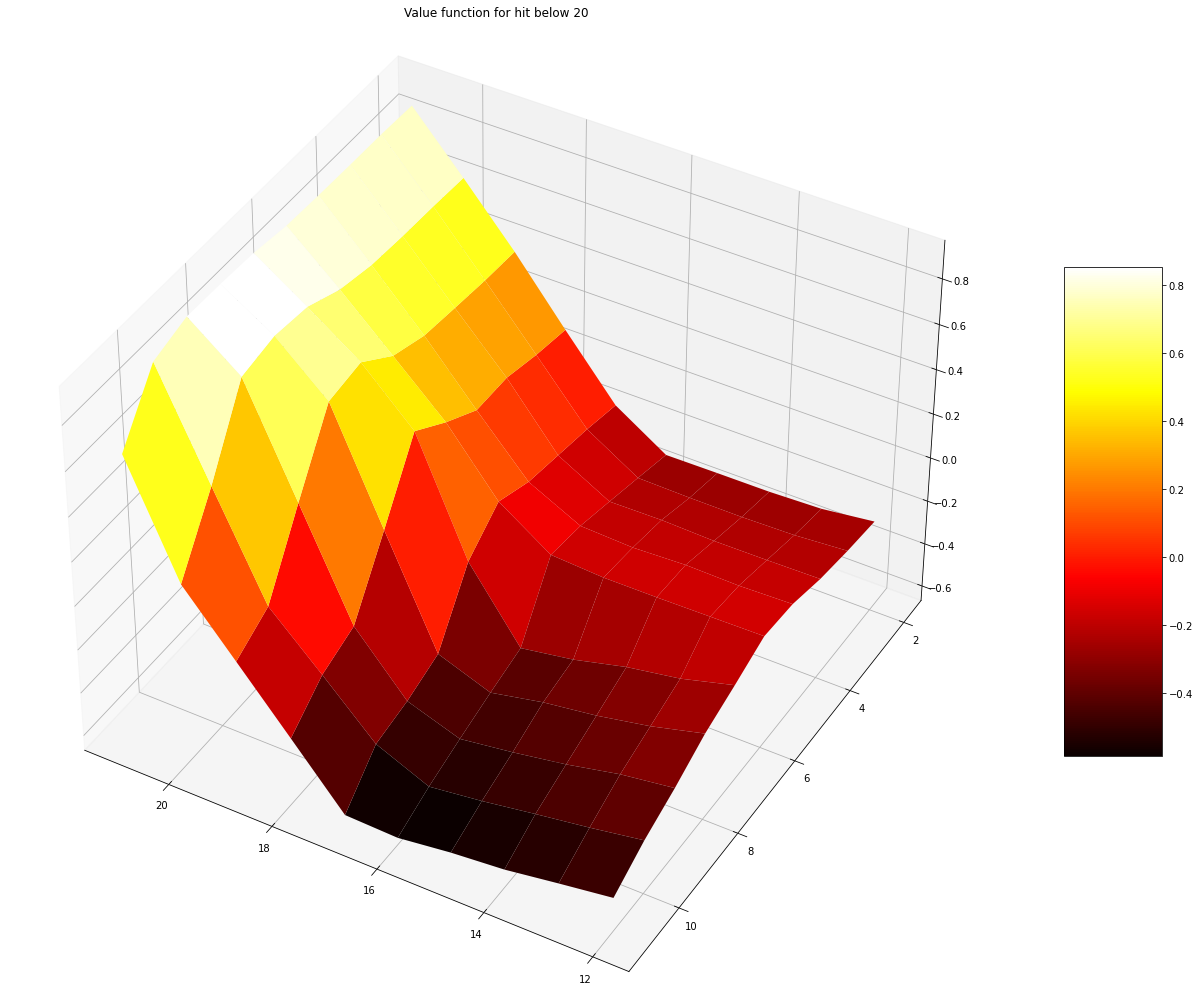

In [89]:
fig = plt.figure(figsize =(28, 18))
ax = plt.axes(projection ='3d')
# defining surface and axes



x = np.linspace(12, 21, 10)
y = np.linspace(2,11,10)

X,Y = np.meshgrid(x,y)
Z = state_value 

my_cmap = plt.get_cmap('hot')

surf = ax.plot_surface(X, Y, Z,
                       cmap = my_cmap,
                       edgecolor ='none')

fig.colorbar(surf, ax = ax,
             shrink = 0.5, aspect = 5)


 
ax.set_title('Value function for hit below 20')
    

ax.view_init(40,120)
plt.draw()


plt.show()

In [ ]:
policy

In [90]:
d_no_ace = dict([(s,v) for s,v in policy.items() if not s[0][1]])
d_ace = dict([(s,v) for s,v in policy.items() if  s[0][1]])

In [91]:
stand_states_no_ace = [(s[0][0],s[1]) for s in d_no_ace.keys() if d_no_ace[s] == 'stand']

In [92]:
stand_states_ace = [(s[0][0],s[1]) for s in d_ace.keys() if d_ace[s] == 'stand']

In [93]:
def predict(s):
    if s in stand_states_no_ace:
        return 0
    else:
        return 1

In [94]:
def predict_ace(s):
    if s in stand_states_ace:
        return 0
    else:
        return 1

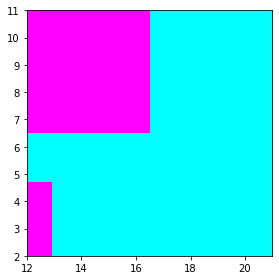

In [95]:
import matplotlib.pyplot as plt

b0_min,b0_max = 12,22
b1_min, b1_max = 2, 12

xx,yy = np.meshgrid(np.arange(b0_min,b0_max,1.),np.arange(b1_min,b1_max,1.))

A = np.vstack((xx.ravel(), yy.ravel())).T

Z = np.array([predict(tuple(s)) for s in A]).reshape(xx.shape)

image = plt.imshow(Z, interpolation=None,
                       extent=(b0_min, b0_max-1, b1_min, b1_max-1),
                        aspect=None, origin='lower', cmap='cool')

plt.tight_layout()
plt.show()

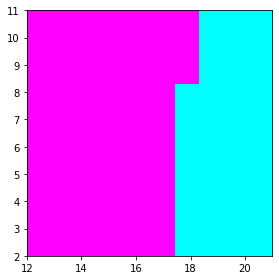

In [96]:
import matplotlib.pyplot as plt

b0_min,b0_max = 12,22
b1_min, b1_max = 2, 12

xx,yy = np.meshgrid(np.arange(b0_min,b0_max,1.),np.arange(b1_min,b1_max,1.))

A = np.vstack((xx.ravel(), yy.ravel())).T

Z = np.array([predict_ace(tuple(s)) for s in A]).reshape(xx.shape)

image = plt.imshow(Z, interpolation=None,
                       extent=(b0_min, b0_max-1, b1_min, b1_max-1),
                        aspect=None, origin='lower', cmap='cool')

plt.tight_layout()
plt.show()

In [ ]:
q

In [ ]:
policy